# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None
df = pd.read_csv('../data/states_edu.csv')

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df.head


<bound method NDFrame.head of              PRIMARY_KEY          STATE  YEAR  ENROLL  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992     NaN      2678885.0   
1            1992_ALASKA         ALASKA  1992     NaN      1049591.0   
2           1992_ARIZONA        ARIZONA  1992     NaN      3258079.0   
3          1992_ARKANSAS       ARKANSAS  1992     NaN      1711959.0   
4        1992_CALIFORNIA     CALIFORNIA  1992     NaN     26260025.0   
...                  ...            ...   ...     ...            ...   
1710       2019_VIRGINIA       VIRGINIA  2019     NaN            NaN   
1711     2019_WASHINGTON     WASHINGTON  2019     NaN            NaN   
1712  2019_WEST_VIRGINIA  WEST_VIRGINIA  2019     NaN            NaN   
1713      2019_WISCONSIN      WISCONSIN  2019     NaN            NaN   
1714        2019_WYOMING        WYOMING  2019     NaN            NaN   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0            304177.0      1659

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [8]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.dropna()

df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 4 Math



How many years of data are logged in our dataset? 

In [5]:
2019-1992

27

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [9]:
df.head

<bound method NDFrame.head of              PRIMARY_KEY          STATE  YEAR  ENROLL_ALL_EST  TOTAL_REVENUE  \
561         2003_ALABAMA        ALABAMA  2003        727900.0      5196054.0   
562          2003_ALASKA         ALASKA  2003        133303.0      1425948.0   
563         2003_ARIZONA        ARIZONA  2003        875111.0      6529894.0   
564        2003_ARKANSAS       ARKANSAS  2003        450158.0      3241275.0   
565      2003_CALIFORNIA     CALIFORNIA  2003       6226552.0     59815855.0   
...                  ...            ...   ...             ...            ...   
1710       2019_VIRGINIA       VIRGINIA  2019             NaN            NaN   
1711     2019_WASHINGTON     WASHINGTON  2019             NaN            NaN   
1712  2019_WEST_VIRGINIA  WEST_VIRGINIA  2019             NaN            NaN   
1713      2019_WISCONSIN      WISCONSIN  2019             NaN            NaN   
1714        2019_WYOMING        WYOMING  2019             NaN            NaN   

      FED

Find the average for your outcome score across all states in 2019

In [17]:
df.groupby('YEAR')["AVG_MATH_4_SCORE"].mean()


YEAR
1992    220.000000
2003    234.000000
2005    237.169811
2007    239.207547
2009    239.547170
2011    240.490566
2013    241.962264
2015    240.415094
2017    239.433962
2019    239.943396
Name: AVG_MATH_4_SCORE, dtype: float64

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [26]:
state = df.groupby("STATE")
state['AVG_MATH_4_SCORE'].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [30]:
df['STATE_REVENUE_PER_STUDENT'] = df['STATE_REVENUE'] / df['ENROLL_ALL']
df['COMPOSITE_8_SCORE'] = (df['AVG_MATH_8_SCORE'] + df['AVG_READING_8_SCORE'])/2

Feature engineering justification: I added a collumn for state revenue per student because there is a chance that states with more revenue per student are able to spend more per student and thus result in a higher test score. I also made a composite score because it provides a wider range of test scores so we can compare the students overall grades to their math 4 grades.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Math Score')

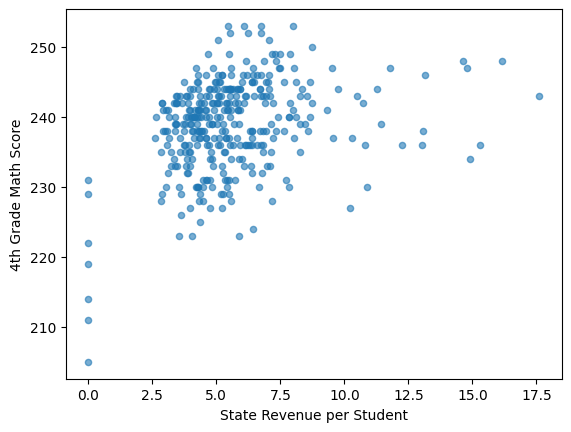

In [29]:
df.plot.scatter(x='STATE_REVENUE_PER_STUDENT', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('State Revenue per Student')
plt.ylabel('4th Grade Math Score')

There appears to not be a strong correlation between the revenue a state recieves per student and their 4th grade math test score. This is surprising because the expectation is more revenue would allow for more resources. 

**Visualization 2**

Text(0, 0.5, '4th Grade Math Score')

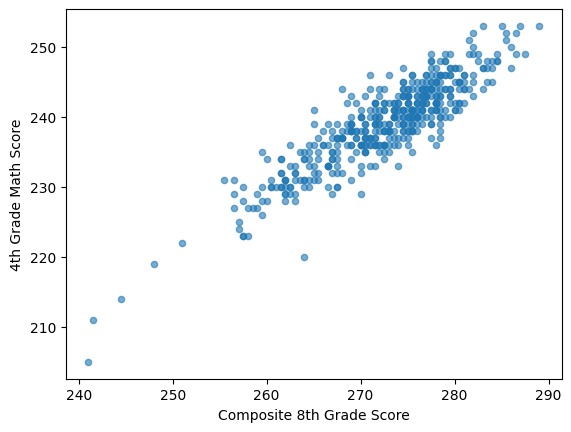

In [31]:
df.plot.scatter(x='COMPOSITE_8_SCORE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Composite 8th Grade Score')
plt.ylabel('4th Grade Math Score')

There is a strong correlation between composite 8th grade scores and 4th grade math scores. This seems to suggest that 4th grade math scores are a good predicitor of how the child will perform when they reach 8th grade.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = df[['ENROLL_8','STATE_REVENUE_PER_STUDENT','COMPOSITE_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [35]:
 X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [36]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [37]:
# create your model here
model = LinearRegression() 

In [38]:
model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [41]:
print(model.intercept_)
print(model.coef_)

model.score(X_test, y_test)

19.450115965147262
[1.98894620e-06 2.86301355e-01 7.99855219e-01]


0.8150754672926639

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

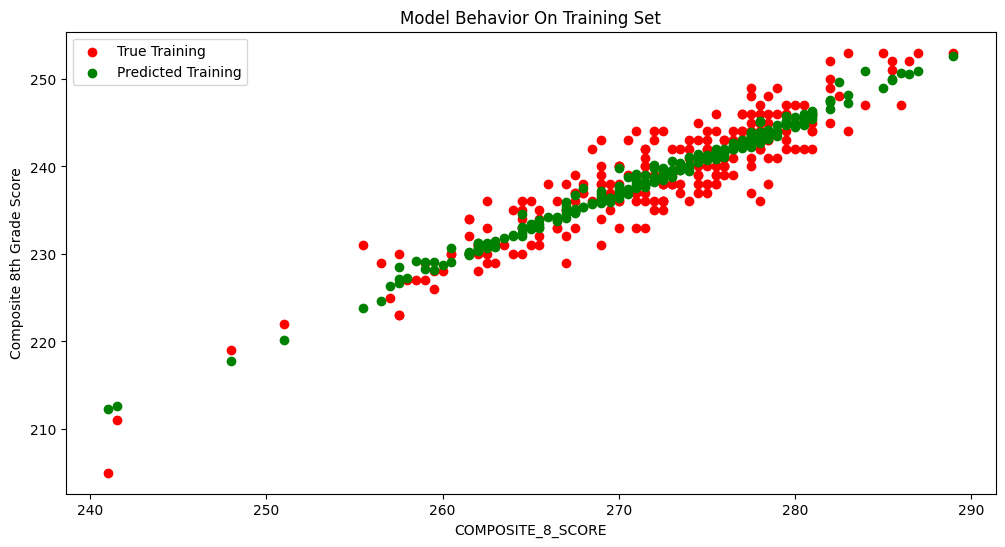

In [42]:
 col_name = 'COMPOSITE_8_SCORE'

 f = plt.figure(figsize=(12,6))
 plt.scatter(X_train[col_name], y_train, color = "red")
 plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

 plt.legend(['True Training','Predicted Training'])
 plt.xlabel(col_name)
 plt.ylabel('Composite 8th Grade Score')
 plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

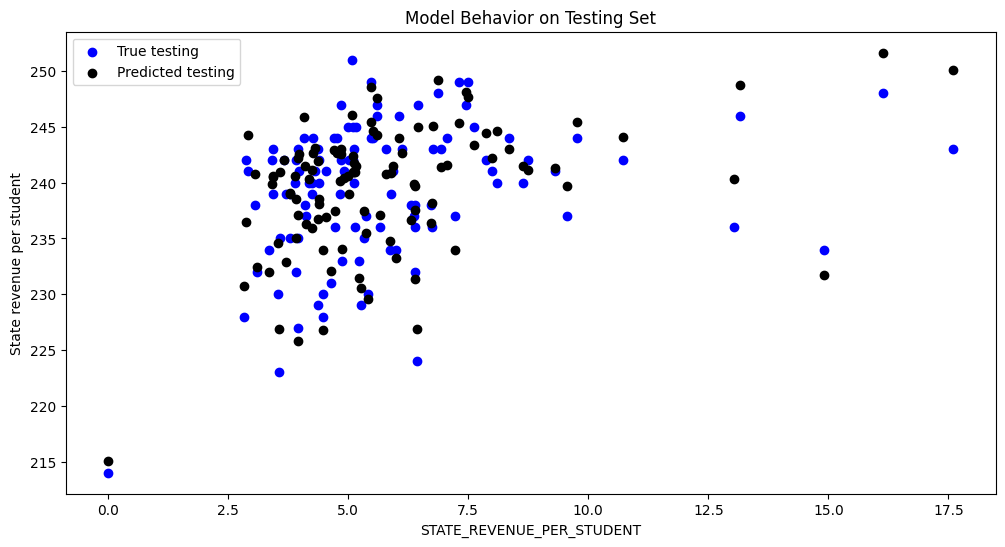

In [44]:
 col_name = 'STATE_REVENUE_PER_STUDENT'

 f = plt.figure(figsize=(12,6))
 plt.scatter(X_test[col_name], y_test, color = "blue")
 plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

 plt.legend(['True testing','Predicted testing'])
 plt.xlabel(col_name)
 plt.ylabel('State revenue per student')
 plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

I decided to look into average 4th grade math scores and indicators that predict those results. I created additional collumns for a composite 8th grade score which averages the students math and reading score. I also created a collumn for state revenue per student to asses if states with larger revenue were able to imporove student performance. The linear regression model had a rsquared value of .81 which is a pretty strong correlation. Our findings suggest that there is a strong correlation between the composite 8th grade scores and 4th grade math scores and a weak correlation between states revenue per student and 4th grade math scores. 